In [1]:
import turicreate as tc

In [43]:
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

In [10]:
sketch = tc.Sketch(image_train['label'])

In [11]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# Split the dataset

In [16]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [37]:
cats_only = image_train.filter_by('cat', 'label', exclude=False)
dogs_only = image_train.filter_by('dog', 'label', exclude=False)
automobiles_only = image_train.filter_by('automobile', 'label', exclude=False)
birds_only = image_train.filter_by('bird', 'label', exclude=False)

In [33]:
cat_model = tc.nearest_neighbors.create(cats_only, features=['deep_features'], label='id')
dog_model = tc.nearest_neighbors.create(dogs_only, features=['deep_features'], label='id')
automobile_model = tc.nearest_neighbors.create(automobiles_only, features=['deep_features'], label='id')
birds_model = tc.nearest_neighbors.create(birds_only, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [53]:
cat_query = cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.094ms      |

| Done         |         | 100         | 35.724ms     |

+--------------+---------+-------------+--------------+

In [54]:
dog_query = dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.638ms      |

| Done         |         | 100         | 35ms         |

+--------------+---------+-------------+--------------+

In [55]:
cat_query 

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [56]:
cat_query['distance'].mean()

36.15573070978294

In [57]:
dog_query['distance'].mean()

37.77071136184157

In [58]:
dog_query

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


# Split test data

In [59]:
image_test_cat = image_test.filter_by('cat', 'label', exclude=False)
image_test_dog = image_test.filter_by('dog', 'label', exclude=False)
image_test_automobile = image_test.filter_by('automobile', 'label', exclude=False)
image_test_bird = image_train.filter_by('bird', 'label', exclude=False)

### Find closest neighbor for dog data

In [62]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = birds_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 380.061ms    |

| Done         | 509000  | 100         | 414.943ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 398.865ms    |

| Done         | 509000  | 100         | 503.602ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 383.764ms    |

| Done         | 509000  | 100         | 408.11ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 59000   | 12.3431     | 408.496ms    |

| Done         | 478000  | 100         | 438.689ms    |

+--------------+---------+-------------+--------------+

In [63]:
dog_cat_neighbors.head()

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [73]:
dog_distances = tc.SFrame({
    'dog-cat': dog_cat_neighbors['distance'],
    'dog-dog': dog_dog_neighbors['distance'],
    'dog-automobile': dog_automobile_neighbors['distance'],
    'dog-bird': dog_bird_neighbors['distance']
})

In [74]:
dog_distances.head()

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [77]:
def is_dog_correct(row):
    return 1 if ((row['dog-dog'] < row['dog-cat']) & (row['dog-dog'] < row['dog-bird']) & (row['dog-dog'] < row['dog-automobile'])) else 0

In [79]:
no_correct = dog_distances.apply(is_dog_correct)

In [80]:
sum(no_correct)

678

In [98]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'], 'id')

,SArray
0,

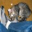

In [104]:
cat = image_test_cat[0:1]
cat['image'].explore()

In [105]:
knn_model = tc.nearest_neighbors.create(image_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [106]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.664ms     |

| Done         |         | 100         | 77.172ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

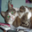
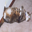
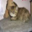
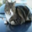
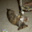

In [107]:
cat_neighbors['image'].explore()

,SArray
0,

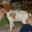

In [108]:
dog = image_test_dog[0:1]
dog['image'].explore()

In [111]:
dog_neighbors = get_images_from_ids(knn_model.query(dog))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.825ms     |

| Done         |         | 100         | 78.567ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

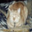
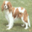
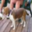
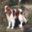
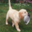

In [112]:
dog_neighbors['image'].explore()

In [113]:
cat_neighbors

id,image,label,deep_features,image_array
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.5109639167785645, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
16289,Height: 32 Width: 32,cat,"[0.964287519454956, 0.0,0.0, 0.0, ...","[215.0, 219.0, 231.0,215.0, 219.0, 232.0, ..."
25713,Height: 32 Width: 32,cat,"[0.5369712710380554, 0.0,0.0, 0.08944588899612 ...","[228.0, 222.0, 236.0,224.0, 213.0, 222.0, ..."
32139,Height: 32 Width: 32,cat,"[1.2940946817398071, 0.0,0.0, 0.5138002634048462, ...","[217.0, 220.0, 205.0,221.0, 227.0, 218.0, ..."
45646,Height: 32 Width: 32,cat,"[0.9836775064468384, 0.0,0.0, 0.0, 0.0, ...","[51.0, 42.0, 26.0, 56.0,47.0, 31.0, 59.0, 50.0, ..."


In [115]:
knn_model.query(cat)


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 13.893ms     |

| Done         |         | 100         | 81.608ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [116]:
knn_model.query(dog)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.511ms     |

| Done         |         | 100         | 85.867ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,49803,33.47735903726341,1
0,21235,34.41522159902278,2
0,23803,34.813863006141204,3
0,41752,34.928931346762944,4
0,33,36.41960770675445,5
